# Сингулярное разложение для вина

Мы выполним сингулярное разложение множества характеристик вина. Создадим при этом две новые искусственные характеристики и посмотрим, чем они лучше.

In [5]:
import numpy as np # массивы и математические операции
import pandas as pd # работа с табличками
import seaborn as sns # графики
from sklearn.preprocessing import StandardScaler # масштабируем данные
from sklearn.decomposition import PCA # боевой svd с другим названием
from numpy.linalg import svd # жемчужинка линейной алгебры

Загружаем данные:

In [3]:
wine = pd.read_csv('Wine.csv')

### Упражнение 0. Немножко осмотритесь по сторонам!

In [7]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


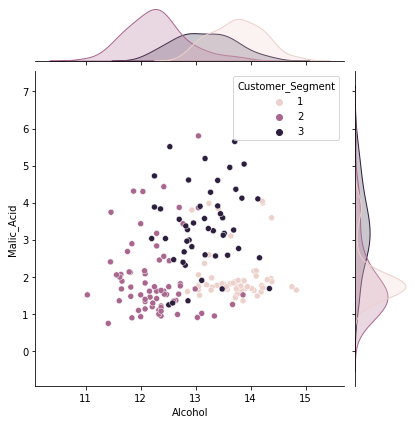

In [8]:
sns.jointplot(data=wine, x='Alcohol', y='Malic_Acid', hue='Customer_Segment')

### Упражнение 1. Сингулярное разложение руками.

Возьмите все переменные кроме `Customer_Segment`. Отмасштабируйте каждую по формуле:

$$x_i \to \frac{x_i - \bar x}{se(x)}$$

где 

$$\bar x = \frac{x_1 + x_2 + \ldots + x_n}{n}, \quad se(x) = \sqrt{\frac{\sum_{i=1}^n(x_i - \bar x)^2}{n-1}}.$$

Для полученной матрицы $X$ выполните сингулярное разложение: $X = U\Sigma V^T$.

На базе сингулярного разложения создайте две первые главные компоненты и изобразите исходные данные отложив первые две компоненты по осям. 

Какой процент общего разброса данных объясняют первые две компоненты?

In [6]:
wine_wo_segment = wine.drop(columns='Customer_Segment')
wine_wo_segment.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_wo_segment)

In [19]:
U, S, Vt = svd(wine_scaled)

In [30]:
Sigma = np.zeros(wine_wo_segment.shape)

In [31]:
Sigma[0, 0] = S[0]
Sigma[1, 1] = S[1]

In [32]:
pc = U @ Sigma

In [36]:
pc[:10, 0:2]

array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082],
       [-3.05025392,  2.12240111],
       [-2.44908967,  1.17485013],
       [-2.05943687,  1.60896307],
       [-2.5108743 ,  0.91807096],
       [-2.75362819,  0.78943767]])

In [24]:
S ** 2 / np.sum(S ** 2)

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

### Упражнение 2. Метод главных компонент.

Повторите первое упражнение используя готовую реализацию метода главных компонент из `sklearn`. Изобразите исходные данные в осях первых двух главных компонент. 

Какой процент общего разброса данных объясняют первые две компоненты?

In [10]:
pca = PCA(n_components=2)

In [11]:
wine_pca = pca.fit_transform(wine_scaled)

In [38]:
wine['pc1'] = wine_pca[:, 0]
wine['pc2'] = wine_pca[:, 1]
wine_pca[0:10, :]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767]])

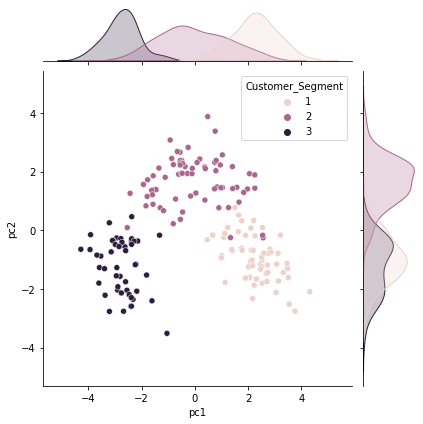

In [13]:
sns.jointplot(data=wine, x='pc1', y='pc2', hue='Customer_Segment')

In [18]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])